<a href="https://colab.research.google.com/github/armangupta910/Movie-Recommendor-System/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

Get Data Set

In [ ]:

# Replace the URL below with the raw URL of your CSV file
url = 'https://raw.githubusercontent.com/armangupta910/Movie-Recommendor-System/main/dataSet/complete_data%20-%20complete_data%20(1).csv.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


   userId  movieId  rating  timestamp_x             title  \
0       1        1     4.0    964982703  Toy Story (1995)   
1       5        1     4.0    847434962  Toy Story (1995)   
2       7        1     4.5   1106635946  Toy Story (1995)   
3      15        1     2.5   1510577970  Toy Story (1995)   
4      17        1     4.5   1305696483  Toy Story (1995)   

                                        genres  tag  timestamp_y  
0  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN  
1  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN  
2  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN  
3  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN  
4  Adventure|Animation|Children|Comedy|Fantasy  NaN          NaN  


Checking number of NaN's in the Data set

<ipython-input-19-f9ec82a88eec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')


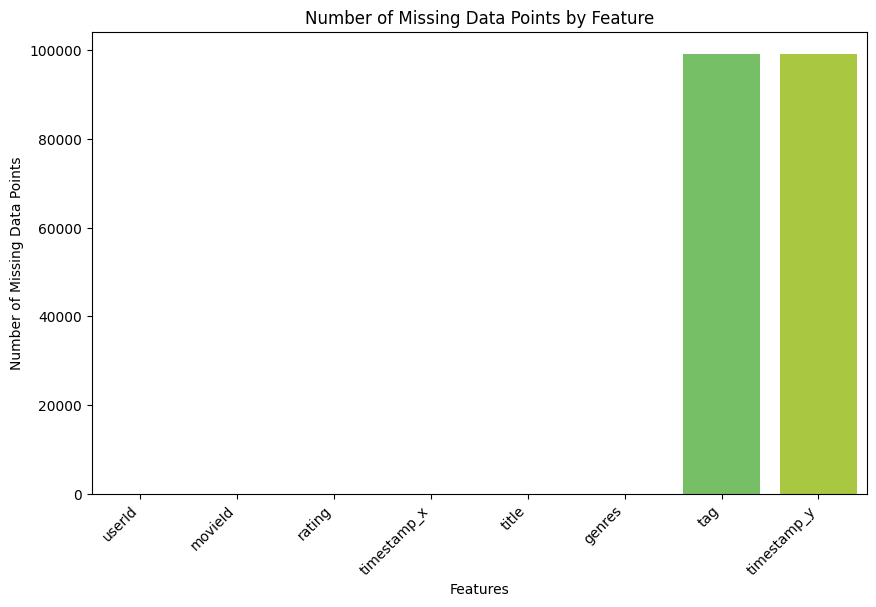

userId             0
movieId            0
rating             0
timestamp_x        0
title              0
genres             0
tag            99201
timestamp_y    99201
dtype: int64


In [ ]:

# Calculate the number of missing values in each column
missing_data = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')
plt.xticks(rotation=45, ha="right")
plt.title('Number of Missing Data Points by Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Data Points')
plt.show()

# Display the number of missing values per column
print(missing_data)


Doing "No Tag" imputation of Tags Feature and dropping timestamp_y feature.

In [ ]:
df = df.drop(columns=['timestamp_y'])

# Impute missing values in the 'tag' column with "No Tag"
df['tag'] = df['tag'].fillna('No Tag')

print(df.head())

   userId  movieId  rating  timestamp_x             title  \
0       1        1     4.0    964982703  Toy Story (1995)   
1       5        1     4.0    847434962  Toy Story (1995)   
2       7        1     4.5   1106635946  Toy Story (1995)   
3      15        1     2.5   1510577970  Toy Story (1995)   
4      17        1     4.5   1305696483  Toy Story (1995)   

                                        genres     tag  
0  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
1  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
2  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
3  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
4  Adventure|Animation|Children|Comedy|Fantasy  No Tag  


Renaming the timestamp_x feature to timestamp

In [ ]:
df = df.rename(columns={'timestamp_x': 'timestamp'})

Again checking the missing values

In [ ]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values per column
print(missing_values)

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64


Visualization

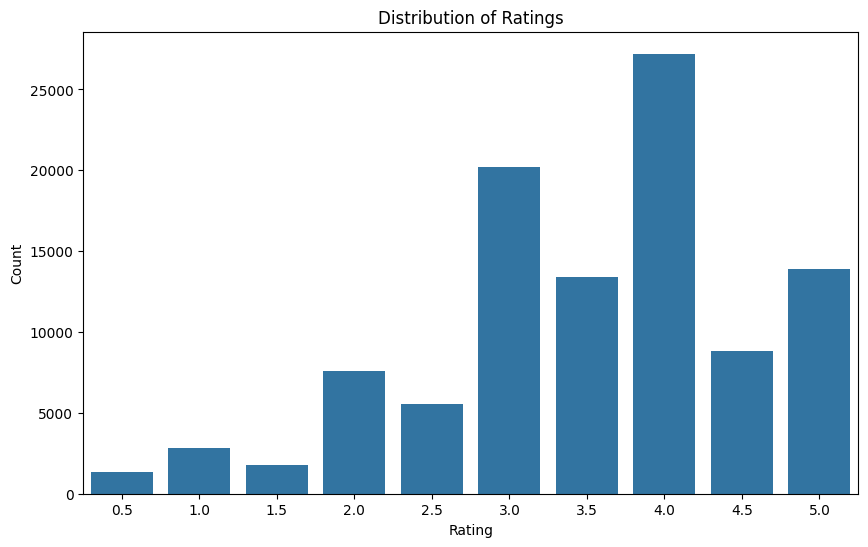

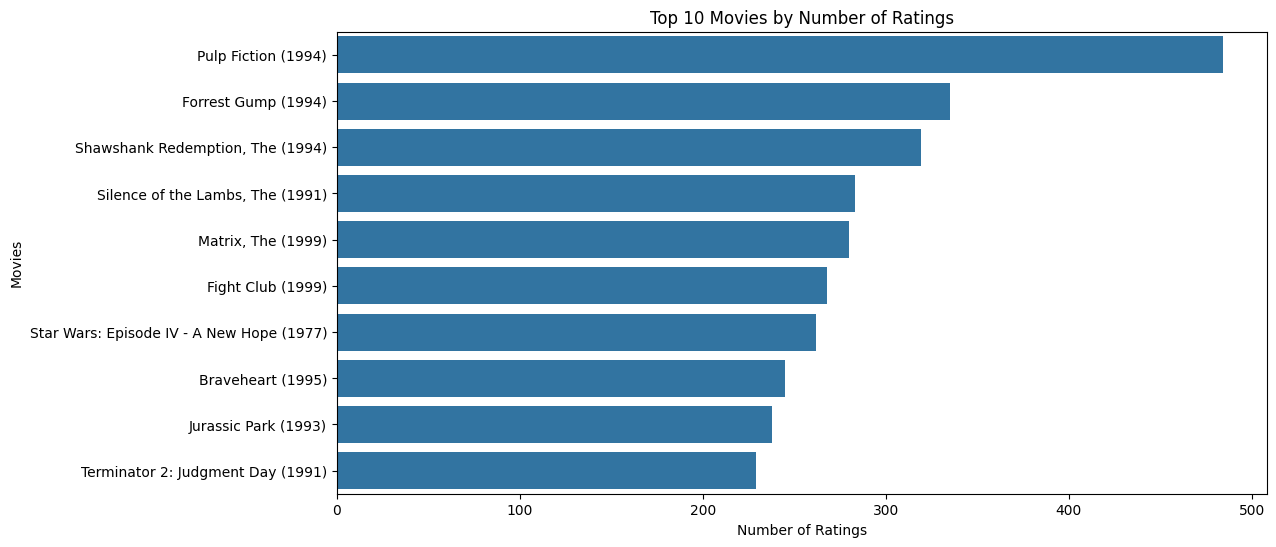

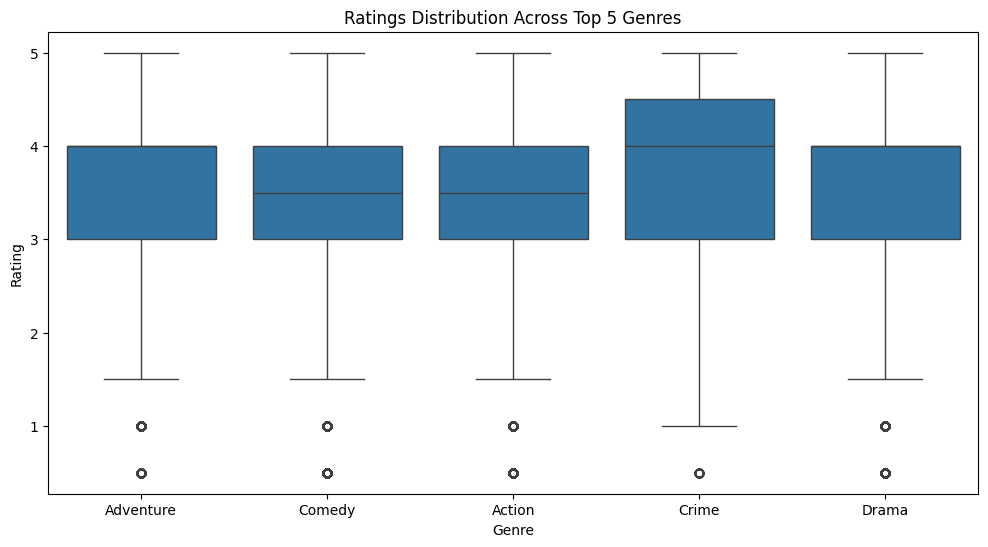

<ipython-input-23-96846f7bfc75>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_movies['average_rating'], y=top_rated_movies.index, palette='coolwarm')


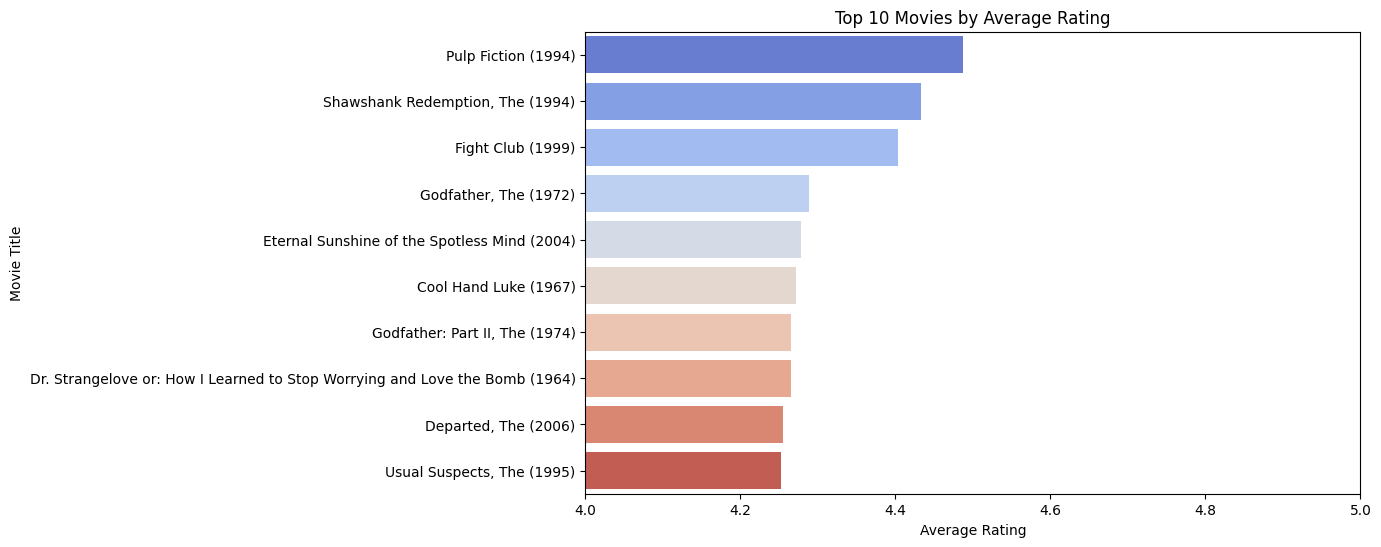

In [ ]:
# Visualization 1: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Visualization 2: Top 10 Movies by Number of Ratings
top_movies = df['title'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies, y=top_movies.index)
plt.title('Top 10 Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movies')
plt.show()

# Visualization 3: Ratings Distribution Across Top 5 Genres
# This requires a bit of preprocessing as 'genres' are pipe-separated
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0])
top_genres = df['main_genre'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='main_genre', y='rating', data=df[df['main_genre'].isin(top_genres)])
plt.title('Ratings Distribution Across Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

average_ratings = df.groupby('title')['rating'].mean()

# Calculate the number of ratings for each movie
ratings_count = df.groupby('title')['rating'].count()

# Creating a DataFrame for average ratings and rating counts
movie_ratings = pd.DataFrame({'average_rating': average_ratings, 'rating_count': ratings_count})

# Filter out movies with a low number of ratings to avoid bias
# For example, only consider movies with more than 50 ratings
movie_ratings = movie_ratings[movie_ratings['rating_count'] > 50]

# Sort movies by average rating
top_rated_movies = movie_ratings.sort_values(by='average_rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies['average_rating'], y=top_rated_movies.index, palette='coolwarm')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.xlim(4, 5)  # Assuming the rating scale is 0.5 to 5
plt.show()




In [ ]:
X = df[['userId', 'movieId']]  # Features
y = df['rating']  # Target variable

# Convert 'userId' and 'movieId' to categorical variables
X['userId'] = X['userId'].astype('category').cat.codes
X['movieId'] = X['movieId'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = [max(i, 1e-9) for i in y_true]  # Replacing 0 with a small value
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")




<ipython-input-25-3cc155b70a1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['userId'] = X['userId'].astype('category').cat.codes
<ipython-input-25-3cc155b70a1c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['movieId'] = X['movieId'].astype('category').cat.codes


MSE: 1.5699259836384885
RMSE: 1.2529668725223697
MAPE: 37.83%
